# Correlation

### Imports

In [ ]:
import pandas as pd
import numpy as np # Used for the correlation coefficient

from matplotlib import pyplot as plt

## What is correlation? <a id="what_is_correlation"></a>
Correlation is defined as "a mutual relationship or connection between two or more things". We will use correlation in the sense of trying to better understand our data and problems. We will continue working today with the Boston housing prices dataset, `boston.csv`. Suppose you were asked the question "what factors influence the price of a house?" To answer this we would need to know the *correlation* between house price and other factors. The simplest way to understand correlation is through scatterplots. Let's draw some scatterplots to get started.

In [ ]:
df = pd.read_csv('data/boston.csv')

In [ ]:
df.head()

Median home value  Crime rate  % industrial  Nitrous Oxide concentration  \
0            24000.0     0.00632          2.31                        0.538   
1            21600.0     0.02731          7.07                        0.469   
2            34700.0     0.02729          7.07                        0.469   
3            33400.0     0.03237          2.18                        0.458   
4            36200.0     0.06905          2.18                        0.458   

   Avg num rooms  % built before 1940  Distance to downtown  \
0          6.575                 65.2                4.0900   
1          6.421                 78.9                4.9671   
2          7.185                 61.1                4.9671   
3          6.998                 45.8                6.0622   
4          7.147                 54.2                6.0622   

   Pupil-teacher ratio  % below poverty line  
0                 15.3                  4.98  
1                 17.8                  9.14  
2                 17.8                  4.03  
3                 18.7                  2.94  
4                 18.7                  5.33

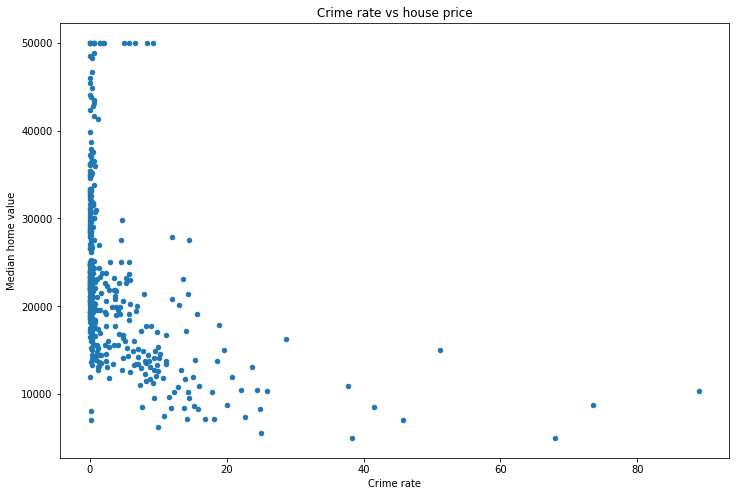

In [ ]:
df.plot(x='Crime rate', 
        y='Median home value', 
        kind='scatter', 
        figsize=(12, 8), 
        title='Crime rate vs house price')

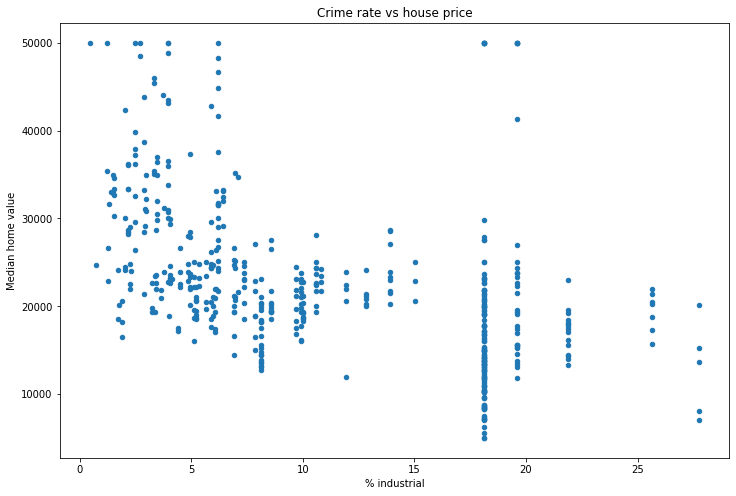

In [ ]:
ax = df.plot(x='% industrial', 
             y='Median home value', 
             kind='scatter', 
             figsize=(12, 8),
             title='Crime rate vs house price')

It looks like we're copying and pasting the same code over and over. This is a good sign that we should write a function!

In [ ]:
def make_scatterplot(df, x, y, figsize=(12, 8)):
    df.plot(x=x, 
            y=y, 
            kind='scatter', 
            figsize=figsize,
            title=f'{x} vs {y}')

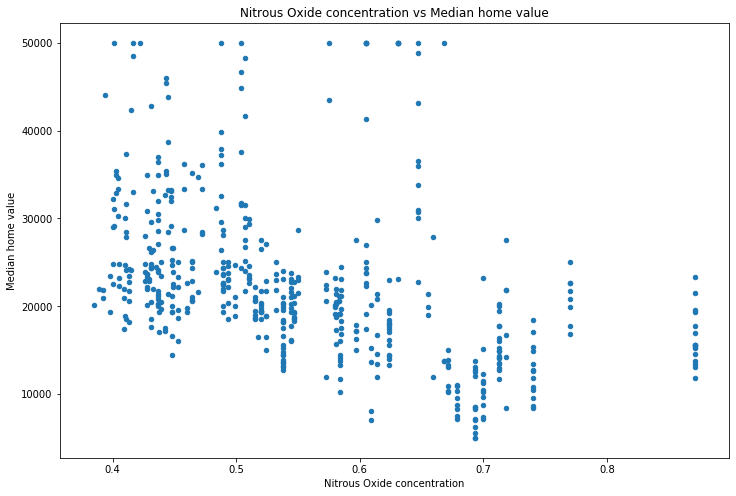

In [ ]:
make_scatterplot(df, x='Nitrous Oxide concentration', y='Median home value')

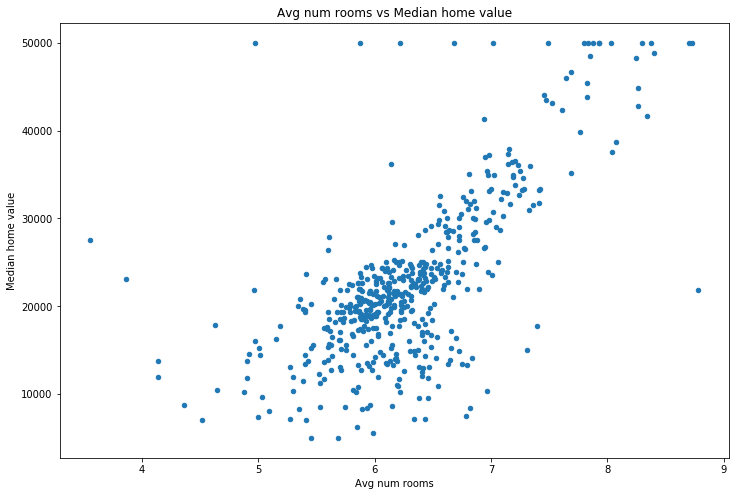

In [ ]:
make_scatterplot(df, x='Avg num rooms', y='Median home value')

### How is correlation measured? <a id="measuring_correlation"></a>

This is good, but it's slow. Also, while we can see that the average number of rooms seems to correlate with the price, what about those in the middle? Both nitrous oxide concentraion and % industrial seem to have a week correlation. Is one better than the other? Scatterplots are great, but they're just a start. To dig deeper we want to understand *what percentage* of the y-value (median home value in this case) is explained by knowing the x-value (no2 concentration, % industrial, etc.). This is precisely what the [Pearson correlation coefficient $R^2$](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) tells us. Pandas has a helper function `.corr()` which computes the correlation coefficients for us.

In [ ]:
df.corr()

Median home value  Crime rate  % industrial  \
Median home value                     1.000000   -0.388305     -0.483725   
Crime rate                           -0.388305    1.000000      0.406583   
% industrial                         -0.483725    0.406583      1.000000   
Nitrous Oxide concentration          -0.427321    0.420972      0.763651   
Avg num rooms                         0.695360   -0.219247     -0.391676   
% built before 1940                  -0.376955    0.352734      0.644779   
Distance to downtown                  0.249929   -0.379670     -0.708027   
Pupil-teacher ratio                  -0.507787    0.289946      0.383248   
% below poverty line                 -0.737663    0.455621      0.603800   

                             Nitrous Oxide concentration  Avg num rooms  \
Median home value                              -0.427321       0.695360   
Crime rate                                      0.420972      -0.219247   
% industrial                                    0.763651      -0.391676   
Nitrous Oxide concentration                     1.000000      -0.302188   
Avg num rooms                                  -0.302188       1.000000   
% built before 1940                             0.731470      -0.240265   
Distance to downtown                           -0.769230       0.205246   
Pupil-teacher ratio                             0.188933      -0.355501   
% below poverty line                            0.590879      -0.613808   

                             % built before 1940  Distance to downtown  \
Median home value                      -0.376955              0.249929   
Crime rate                              0.352734             -0.379670   
% industrial                            0.644779             -0.708027   
Nitrous Oxide concentration             0.731470             -0.769230   
Avg num rooms                          -0.240265              0.205246   
% built before 1940                     1.000000             -0.747881   
Distance to downtown                   -0.747881              1.000000   
Pupil-teacher ratio                     0.261515             -0.232471   
% below poverty line                    0.602339             -0.496996   

                             Pupil-teacher ratio  % below poverty line  
Median home value                      -0.507787             -0.737663  
Crime rate                              0.289946              0.455621  
% industrial                            0.383248              0.603800  
Nitrous Oxide concentration             0.188933              0.590879  
Avg num rooms                          -0.355501             -0.613808  
% built before 1940                     0.261515              0.602339  
Distance to downtown                   -0.232471             -0.496996  
Pupil-teacher ratio                     1.000000              0.374044  
% below poverty line                    0.374044              1.000000

Note that this actually returns $R$, not $R^2$. We typically look at $R^2$ because it has a nice interpretation (next paragraph).

This returns a matrix where the number in each cell is the correlation coefficient for those two columns. For instance, looking at the top row, we see that the correlation coefficient between "Median home value" and "Avg num rooms" is $0.696^2=0.4844$, so approximately 48.4% of the variation in the median home value in an area is determined by the number of rooms in that area. 

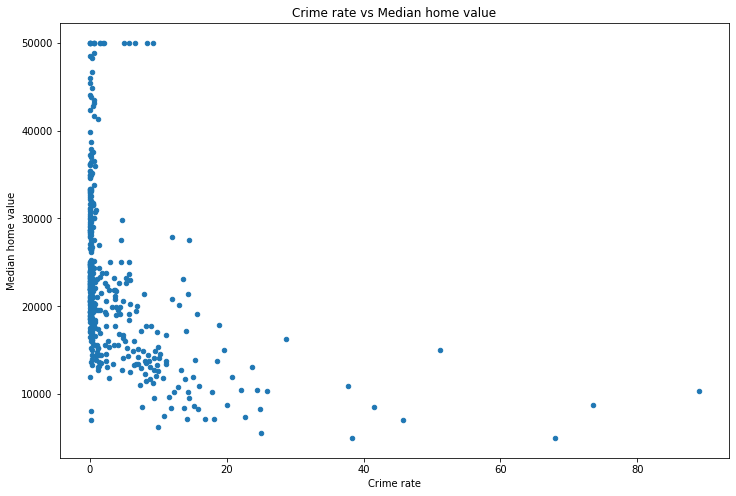

In [ ]:
make_scatterplot(df, x='Crime rate', y='Median home value')

We can see that as the crime rate increases the median home value drops, so the relationship is negative. This makes sense, since increased crime will likely lead to lower home prices.

What about correlation coefficients that are close to zero? We can see that there seems to be a weak relationship (i.e. small correlation coefficient) between "Pupil-teacher ratio" and "Nitrous Oxide concentration" (basically polution). Let's see what that looks like.

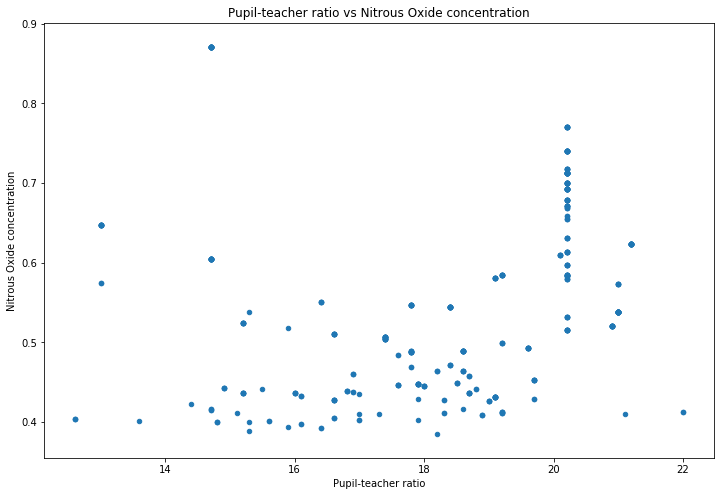

In [ ]:
make_scatterplot(df, x='Pupil-teacher ratio', y='Nitrous Oxide concentration')

We can see that there's no obvious relationship, which is what the low $R^2$ value is suggesting.

Besides using Pandas, you can also compute the correlation coefficient using numpy. The command for this is `.corrcoef(...)`. The arguments you use are simply the two vectors you want to compute the correlation coefficient between. So for example, let's compute the correlation coefficient between the `pupil_teacher_ratio` column and the `nitrous_oxide_concentration` column.

In [ ]:
df.head()

Median home value  Crime rate  % industrial  Nitrous Oxide concentration  \
0            24000.0     0.00632          2.31                        0.538   
1            21600.0     0.02731          7.07                        0.469   
2            34700.0     0.02729          7.07                        0.469   
3            33400.0     0.03237          2.18                        0.458   
4            36200.0     0.06905          2.18                        0.458   

   Avg num rooms  % built before 1940  Distance to downtown  \
0          6.575                 65.2                4.0900   
1          6.421                 78.9                4.9671   
2          7.185                 61.1                4.9671   
3          6.998                 45.8                6.0622   
4          7.147                 54.2                6.0622   

   Pupil-teacher ratio  % below poverty line  
0                 15.3                  4.98  
1                 17.8                  9.14  
2                 17.8                  4.03  
3                 18.7                  2.94  
4                 18.7                  5.33

In [ ]:
np.corrcoef(df['Pupil-teacher ratio'], df['Nitrous Oxide concentration'])

array([[1.        , 0.18893268],
       [0.18893268, 1.        ]])

You can see that this returns a matrix, just like Pandas did. What we want are either of those two values that are not on the diagonal. So we'll access them using `[0, 1]`, which means "zeroth row, first column", just like you would normally think of a matrix.

In [ ]:
np.corrcoef(df['Pupil-teacher ratio'], df['Nitrous Oxide concentration'])[0, 1]

0.18893267711276704

Just like Pandas, this return $R$, not $R^2$ (Pandas is actually *using numpy* to do its calculations). So we'll square it using the Python squaring operator `**`.

In [ ]:
np.corrcoef(df['Pupil-teacher ratio'], df['Nitrous Oxide concentration'])[0, 1]**2

0.035695556480997086

### What correlation does (and does not) tell you <a id="what_corr_tells_you"></a>

Now that we can measure and visualize correlation, it's worth thinking about what we learn and don't learn from it. What we learn is fairly obvious--we can find a relationship between two variables. For example, the scatterplot above shows us (and the associated $R^2$ value) tells us that as the average number of rooms increase, so does the median home value.

Some people think of a high $R^2$ value as meaning that the data is close to a line. This is *false*. While it is true that an $R^2$ value of $\pm 1$ means that the data is a perfect line, any other $R^2$ value does not necessarily reflect a line. For instance, consider the famous dataset Anscombe's quartet:

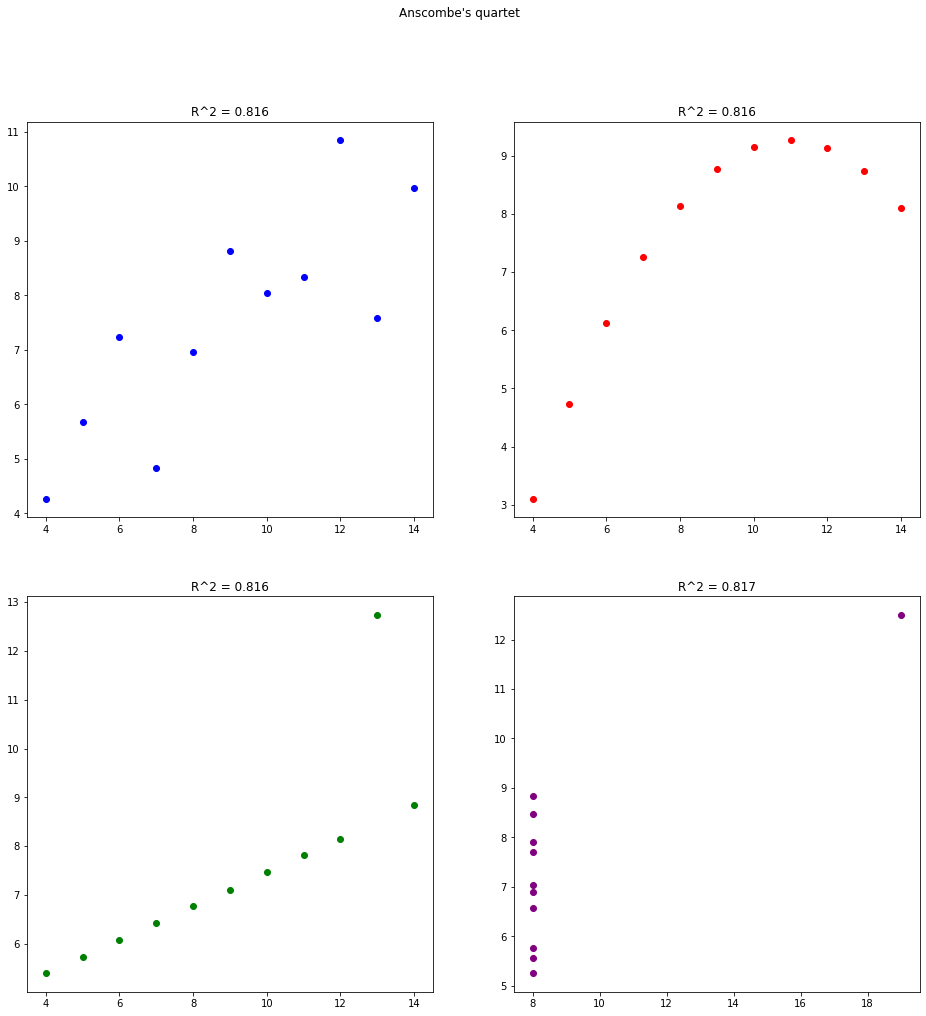

In [ ]:
# Four different datasets
x1 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

x2 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]

x3 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]

x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

# Create a graph with four different axes, one for each dataset
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))

# Plot each one and set the title to the be R^2 value
ax1.scatter(x1, y1, color='blue')
ax1.set_title(f'R^2 = {np.corrcoef(x1, y1)[0, 1]**2:.3}')

ax2.scatter(x2, y2, color='red')
ax2.set_title(f'R^2 = {np.corrcoef(x2, y2)[0, 1]:.3}')

ax3.scatter(x3, y3, color='green')
ax3.set_title(f'R^2 = {np.corrcoef(x3, y3)[0, 1]:.3}')

ax4.scatter(x4, y4, color='purple')
ax4.set_title(f'R^2 = {np.corrcoef(x4, y4)[0, 1]:.3}')

fig.suptitle("Anscombe's quartet");

You can see that all four datasets have the same (very high) correlation coefficient of approximately 81.6%. However, all but the first one have strange patterns. By looking at the graph you can easily spot the patterns. But if you just rely on the correlation coefficient then you miss this. So in two dimensions you should rely on your *eyes*, not on a number.

### Multiple correlation  <a id="multiple_correlation"></a>

When working with just two variables, correlation coefficient is only somewhat useful. Afterall, we can just look at the graph and form a better conclusion than any single number could tell us. However, what about when we want to understand the relationship between three or more variables? For three we could do a 3d plot, such as below:

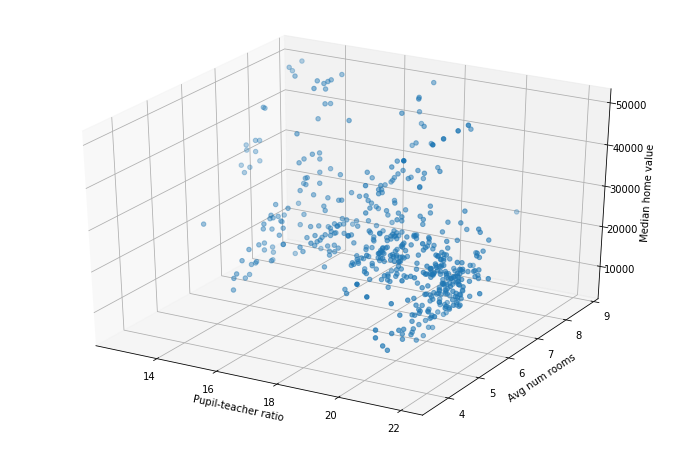

In [ ]:
from mpl_toolkits.mplot3d import Axes3D # Used for 3d plotting

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Pupil-teacher ratio'], df['Avg num rooms'], df['Median home value'])

ax.set_xlabel('Pupil-teacher ratio')
ax.set_ylabel('Avg num rooms')
ax.set_zlabel('Median home value');

## Joining multiple DataFrames <a id="joining"></a>

Often times your data will be split across multiple different files. Combining these into one DataFrame is referred to as "joining" your data. While we will be doing this in Pandas, this same idea is extremely common in databases. If you learn how to do it here you will have a great start on joining data in databases as well.

There are multiple different ways you can join data, however we will focus on two of them: concatenating and merging. 

### Concatenating data
Concatenating data refers to simply stacking two DataFrames on top of one another. For example, let's create some fake data for two different math courses.

In [ ]:
course1_df = pd.DataFrame({'students': ['Alice', 'Bob', 'Cathy', 'David'], 'final_exam_score': [90, 84, 79, 50]})
course2_df = pd.DataFrame({'students': ['Esther', 'Frank', 'George', 'Heather', 'Ingrid'], 'final_exam_score': [52, 65, 91, 100, 87]})

In [ ]:
course1_df

students  final_exam_score
0    Alice                90
1      Bob                84
2    Cathy                79
3    David                50

In [ ]:
course2_df

students  final_exam_score
0   Esther                52
1    Frank                65
2   George                91
3  Heather               100
4   Ingrid                87

Suppose we want to find the average across *all* courses. We *could* compute the average in each course separately, then compute the average of those two averages (being careful to weight them according to the number of students). Rather than doing that, let's just concatenate these two DataFrames into one new DataFrame, and compute the average there. We can do that using the Pandas command `.concat()`. You simply give it a list of the DataFrames you want to concatenate. We're doing it with two of them, but you could do it with as many as you like.

In [ ]:
all_courses = pd.concat([course1_df, course2_df])

all_courses

students  final_exam_score
0    Alice                90
1      Bob                84
2    Cathy                79
3    David                50
0   Esther                52
1    Frank                65
2   George                91
3  Heather               100
4   Ingrid                87

In [ ]:
all_courses['final_exam_score'].mean()

77.55555555555556

### Merging
Merging data refers to taking two (or more) DataFrames which have some relationship and joining them together. Let's continue with our above example of two different courses. Suppose the university tracked your grade across different courses, and wanted to make one new dataset showing every course you have taken. In the above (fake) data there are no students shared across `course1` and `course2`. So let's make a new course which has some of those students (perhaps `course1` and `course2` are just different sections of the same course, whereas `course3` below is a whole new course).

In [ ]:
course3_df = pd.DataFrame({'students': ['Alice', 'Esther', 'George', 'Bob', 'Jacob'], 'final_exam_score': [87, 45, 98, 55, 27]})

In [ ]:
course3_df

students  final_exam_score
0    Alice                87
1   Esther                45
2   George                98
3      Bob                55
4    Jacob                27

To merge the data we using the Pandas `.merge()` function. There are actually multiple different ways to use this function. We'll show two different ones below. Just pick the one you feel makes most sense and stick with it.

In [ ]:
# Method 1
course13_merge1_df = pd.merge(course1_df, course3_df, on='students')

# Method 2
course13_merge2_df = course1_df.merge(course3_df, on='students')

In [ ]:
course13_merge1_df

students  final_exam_score_x  final_exam_score_y
0    Alice                  90                  87
1      Bob                  84                  55

In [ ]:
course13_merge2_df

students  final_exam_score_x  final_exam_score_y
0    Alice                  90                  87
1      Bob                  84                  55

As you can see, these two methods produced the same results. Because of that I will just stick with the first method. Anything we learn for one method applies directly to the other method.

Looking at the results above, we can see that the merged DataFrame has the grades for both Alice and Bob in their two courses. However, there are a few things to discuss:
1. Why does it only have Alice and Bob? What about the other students?
2. Why are the columns called `final_exam_score_x/y`?

There are many types of merges (called "joins" when working with databases, but the ideas are identical), however we will focus on four of them. They are:
- **Inner join:** Only take those rows which exist in both DataFrames. This is the default behavior for `.merge()`. So we only took Alice and Bob because those are the only two students that exist in both `course1_df` and `course3_df` (look at the DataFrames to verify this).
- **Left join:** Take all rows from the "left" DataFrame, and only take the rows from the right DataFrame which also exist in the left. See the example below.
- **Right join:** Exactly the same as the "left join", but replace "left" with "right".
- **Outer/full join:** Take all rows from both DataFrames.

Here is a diagram showing these:

![Merges/joins](images/joins.png)

You specify each of these by using the parameter `how` in the `.merge()` function. Let's show the result of each.

In [ ]:
course13_inner_df = pd.merge(course1_df, course3_df, how='inner', on='students') # As noted above, the default behavior is an inner merge, so you actually don't need to specify how='inner', it will do it by default
course13_left_df = pd.merge(course1_df, course3_df, how='left', on='students')
course13_right_df = pd.merge(course1_df, course3_df, how='right', on='students')
course13_full_df = pd.merge(course1_df, course3_df, how='outer', on='students')

An inner join is exactly what we did above. Just this time we explicitly wrote `how='inner'`, which doesn't affect anything.

In [ ]:
course13_inner_df

students  final_exam_score_x  final_exam_score_y
0    Alice                  90                  87
1      Bob                  84                  55

Notice that we have all students from the "left" course `course1_df` (this is the "left" course because it's literally on the left when you write `pd.merge(course1_df, course3_df, how='left', ...)`)

In [ ]:
course13_left_df

students  final_exam_score_x  final_exam_score_y
0    Alice                  90                87.0
1      Bob                  84                55.0
2    Cathy                  79                 NaN
3    David                  50                 NaN

The right join is just the opposite of the left join. It takes all students in the "right" course `course3_df`.

In [ ]:
course13_right_df

students  final_exam_score_x  final_exam_score_y
0    Alice                90.0                  87
1      Bob                84.0                  55
2   Esther                 NaN                  45
3   George                 NaN                  98
4    Jacob                 NaN                  27

Finally, the outer join. This shows all students from each class.

In [ ]:
course13_full_df

students  final_exam_score_x  final_exam_score_y
0    Alice                90.0                87.0
1      Bob                84.0                55.0
2    Cathy                79.0                 NaN
3    David                50.0                 NaN
4   Esther                 NaN                45.0
5   George                 NaN                98.0
6    Jacob                 NaN                27.0

Note that for everything except the inner join, there are students which appear in only one of the two classes. In that case, there is no grade to put for them in the other course, because they weren't in it!

Let's now turn to the next question, which is the column name. If Pandas sees two columns with the same name (such as how `final_exam_score` is a column in both `course1_df` and `course3_df`) it has to rename them (since Pandas won't allow a DataFrame to have two columns with the same name). Therefore it appends `_x` or `_y` to the end of the name. If you don't like those names, just rename them.

In [ ]:
course13_full_df.columns = ['students', 'course1_final_exam_score', 'course3_final_exam_score']

course13_full_df

students  course1_final_exam_score  course3_final_exam_score
0    Alice                      90.0                      87.0
1      Bob                      84.0                      55.0
2    Cathy                      79.0                       NaN
3    David                      50.0                       NaN
4   Esther                       NaN                      45.0
5   George                       NaN                      98.0
6    Jacob                       NaN                      27.0

These examples give you a good idea about how you can join DataFrames. However, they are also simplified examples. For example, consider the following more complicated example of students, a course and a club.

In [ ]:
students_df = pd.DataFrame({'student_id': [1, 2, 3, 4, 5, 6], 
                            'name': ['Alice', 'Bob', 'Cathy', 'Bob', 'Derek', 'Esther']})
course_df = pd.DataFrame({'student_id_number': [3, 5, 8, 13, 59, 1, 4], 
                          'grade': [65, 74, 24, 74, 86, 100, 52]})
club_df = pd.DataFrame({'club_name': ['Math', 'Chess', 'Waffle'],
                       'club_officer_student_id': [2, 6, 19]})

In [ ]:
students_df

student_id    name
0           1   Alice
1           2     Bob
2           3   Cathy
3           4     Bob
4           5   Derek
5           6  Esther

In [ ]:
course_df

student_id_number  grade
0                  3     65
1                  5     74
2                  8     24
3                 13     74
4                 59     86
5                  1    100
6                  4     52

In [ ]:
club_df

club_name  club_officer_student_id
0      Math                        2
1     Chess                        6
2    Waffle                       19

What we want is to make a single DataFrame with *all students*, along with their grade in the course (or `None`/`NaN` if they were not in the course). Finally, if they're a club officer we want to indicate which club it's for (or `None`/`NaN` if they were not an officer).

Since we want all students, we could do something like `pd.merge(students_df, some_other_df, how='left')`. Since `students_df` is on the left and we are doing `how='left'` (a left join), this will take all students. Let's start by merging the students with the course. Both columns have a column with the student id, but the columns are named differently (`student_id` vs `student_id_number`). While we *could* rename them to match, that messes with our data and is unnecessary. Instead, Pandas has `left_on=...` and `right_on=...` options which let you specify the column for the left and right DataFrames separately (for exactly this situation where the left and right column names are different).

In [ ]:
merged_df = pd.merge(students_df, course_df, how='left', left_on='student_id', right_on='student_id_number')

merged_df

student_id    name  student_id_number  grade
0           1   Alice                1.0  100.0
1           2     Bob                NaN    NaN
2           3   Cathy                3.0   65.0
3           4     Bob                4.0   52.0
4           5   Derek                5.0   74.0
5           6  Esther                NaN    NaN

We can see that all students are included (since we did a left join and `students_df` was on the left). We can also see that if the student was in the course then their grade shows up, and `NaN` shows up otherwise. Before we work on merging the club as well, let's clean up some things. First, we don't need both `student_id` and `student_id_number`, so let's drop the `student_id_number` column. 

In [ ]:
merged_df = merged_df.drop('student_id_number', axis='columns')

merged_df

student_id    name  grade
0           1   Alice  100.0
1           2     Bob    NaN
2           3   Cathy   65.0
3           4     Bob   52.0
4           5   Derek   74.0
5           6  Esther    NaN

Let's now turn to merging the club. Again, we want to keep all students, but just merge in any club data we have for that student. So we'll do a left join with `merged_df` on the left so that we keep everything we already did. Again, both DataFrames have a student id column, but they have different names. So we'll specify that using `left_on` and `right_on`.

In [ ]:
merged_df = pd.merge(merged_df, club_df, how='left', left_on='student_id', right_on='club_officer_student_id')

merged_df

student_id    name  grade club_name  club_officer_student_id
0           1   Alice  100.0       NaN                      NaN
1           2     Bob    NaN      Math                      2.0
2           3   Cathy   65.0       NaN                      NaN
3           4     Bob   52.0       NaN                      NaN
4           5   Derek   74.0       NaN                      NaN
5           6  Esther    NaN     Chess                      6.0

Again, we don't need the duplicate student id's, so let's drop the one coming from `club_df`.

In [ ]:
merged_df = merged_df.drop('club_officer_student_id', axis='columns')

merged_df

student_id    name  grade club_name
0           1   Alice  100.0       NaN
1           2     Bob    NaN      Math
2           3   Cathy   65.0       NaN
3           4     Bob   52.0       NaN
4           5   Derek   74.0       NaN
5           6  Esther    NaN     Chess

And we're done! We have all students along with their id number, grade in the course (if they took it), and club they are an officer of (if they are one). These examples should give you a great starting point for joining together data.

### Exercises

In the data folder is a file `texas_house_2018.csv`, which shows the results of the 2018 Texas House of Representatives elections. It shows the district, number of votes the candidate, money raised, and more. The `Total_Votes` column is the total number of votes *any candidate* for that position received. So for instance, 60,279 votes were case for District 4, of which 44,669 went to Gregory Keith Bell. The `Total_$` column is the amount of money that candidate raised. Use this dataset to explore the following questions:

1. How many rows have a missing value? Drop any rows with a missing value.
2. What is the data type for each column once you load the data using Pandas? Fix any data types that are incorrectly loaded.
3. Change all column names so that they are lower-cased (no upper case letters).
4. Check the columns and see if the min and max values make sense. Did anyone get negative votes? 120% of the votes?
5. How well does the total amount of money raised correlate with *how many* votes they got?
6. How well does the total amount of money raised correlate with the *percentage* of votes they got?
7. Which one of these is the "better" comparison? Should we be comparing money raised against number of votes or percentage of votes? Or something else? Why?
8. Make graphs trying to understand what factors are important. How important is it being a Republican vs a Democrat vs Third-Party? What about incumbent vs challenger? 
9. Which districts seem to have the most money? That is, which districts have candidates raising the most money? The least?
10. Can you find any strange correlations? What about the number of letters in a person's name? Incumbents who did terribly?

In the data folder is another folder `retail_sales`. It contains three different datasets, all with a `store` column. Try merging them various ways (left, right, outer, inner) along the store column and see what you get.